# Загрузка данных

In [2]:
! gdown --id 1k-kKZScv3oIvcEF3Tk2r6F9wD1voQYfZ #архив в гугле

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1k-kKZScv3oIvcEF3Tk2r6F9wD1voQYfZ
To: /content/archive.zip
100% 554k/554k [00:00<00:00, 58.4MB/s]


In [3]:
! unzip /content/archive.zip #распаковка архива

Archive:  /content/archive.zip
  inflating: test.csv                
  inflating: train.csv               


# Скачивание интсрументов

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.simplefilter('ignore')


from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

In [44]:
!pip install plotly

In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [6]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

Вытаскиванием все данные

In [10]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Преобразование данных

Преобразование данных, чтобы было красиво

In [11]:
df_train['education'] = df_train['education'].replace('unknown', 'others')
df_train['job'] = df_train['job'].replace('unknown', 'others')
df_test['education'] = df_test['education'].replace('unknown', 'others')
df_test['job'] = df_test['job'].replace('unknown', 'others')
df_test['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
others            38
Name: job, dtype: int64

In [12]:
df_train = df_train.apply(LabelEncoder().fit_transform)
df_test = df_test.apply(LabelEncoder().fit_transform)

In [13]:
df_train['default'].value_counts()

0    44396
1      815
Name: default, dtype: int64

Теперь все значения численные, осталось привести их к одному измерению

In [14]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,3,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,10,2,2,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,2,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,0,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,5,2,0,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,10,1,3,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,6,0,1,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,6,1,2,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,2,0,1584,0,0,1,16,9,508,3,0,0,3,0


In [15]:
df_train['balance'].describe()

count    45211.000000
mean      1963.307469
std       1463.533246
min          0.000000
25%        988.000000
50%       1364.000000
75%       2344.000000
max       7167.000000
Name: balance, dtype: float64

Больщинство значений находятся от 0 до 4000, поэтому удалим эти данные

<Axes: xlabel='balance', ylabel='Density'>

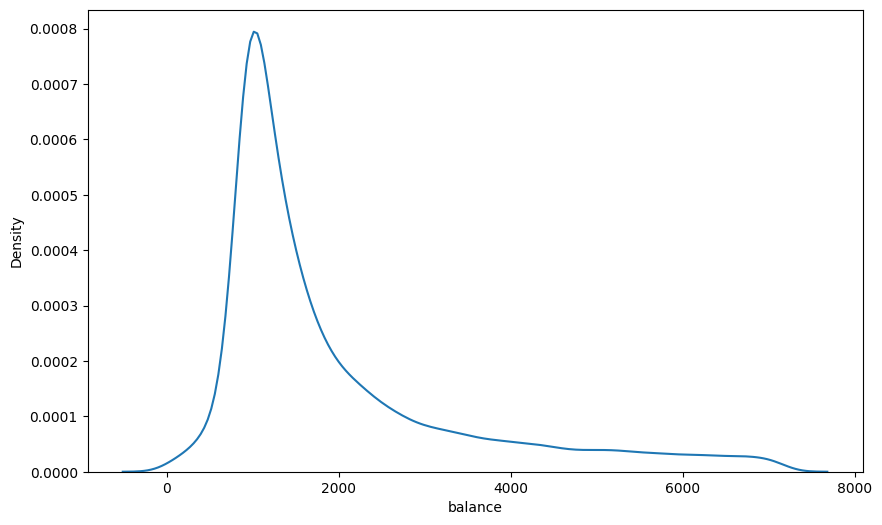

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_train['balance'])

In [17]:
df_test = df_test[df_test['balance'] >= 0]

<Axes: xlabel='balance', ylabel='Density'>

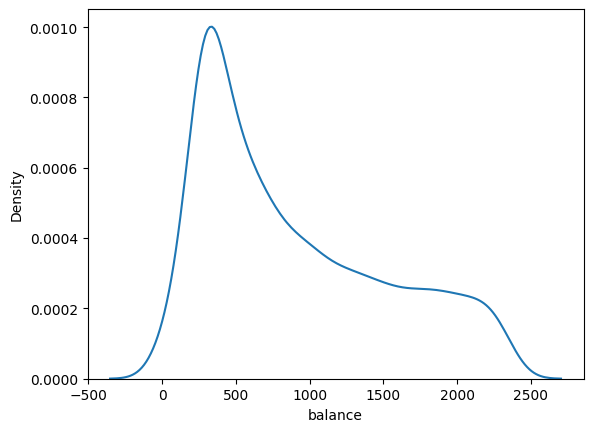

In [18]:
sns.kdeplot(df_test['balance'])

In [19]:
count = 0
for i in df_train['balance']:
  if i >= 6000:
    count += 1
print(count)

1491


In [20]:
df_train = df_train[df_train['balance'] <= 6000]

In [21]:
df_train['balance'].describe()

count    43722.00000
mean      1806.61150
std       1210.58274
min          0.00000
25%        979.00000
50%       1330.00000
75%       2190.00000
max       6000.00000
Name: balance, dtype: float64

In [22]:
df_train = df_train[df_train['balance'] >= 0]

Есть данные выше 4000, но они слишком отличаются от остальных

Text(0.5, 1.0, 'Box Plot of Account Balance')

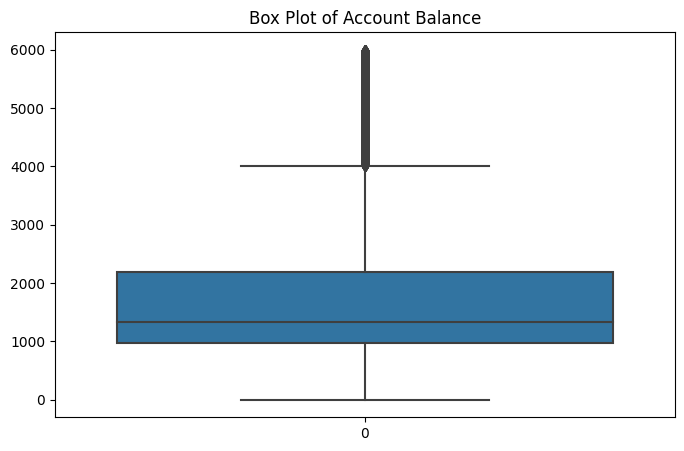

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(df_train['balance'])
plt.title('Box Plot of Account Balance')

In [24]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,11,11,1,1,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,8,1,2,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,3,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,3,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,2,0,274,1,0,2,4,8,222,0,0,0,3,0


Как выяснилось из предыдущего задания колонки: previous, poutcome, default - имеют большой перекос в данных, то есть показывает большое количество 1 и малое количество 0, что не мешает предсказнию, поэтому я удаляю эти колонки

In [25]:
df_train.drop(columns = ['previous'], inplace = True)
df_test.drop(columns = ['previous'], inplace = True)

In [26]:
df_train.drop(columns = ['poutcome'], inplace = True)
df_test.drop(columns = ['poutcome'], inplace = True)

In [27]:
df_train.drop(columns = ['default'], inplace = True)
df_test.drop(columns = ['default'], inplace = True)

In [28]:
df_train

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,40,4,1,3,3036,1,0,2,4,8,261,0,0,0
1,26,10,2,2,945,1,0,2,4,8,151,0,0,0
2,15,2,1,2,918,1,1,2,4,8,76,0,0,0
3,29,1,1,0,2420,1,0,2,4,8,92,0,0,0
4,15,5,2,0,917,0,0,2,4,8,198,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,10,1,3,1741,0,0,0,16,9,975,2,0,1
45207,53,6,0,1,2639,0,0,0,16,9,456,1,0,1
45208,54,6,1,2,5455,0,0,0,16,9,1116,4,181,1
45209,39,1,1,2,1584,0,0,1,16,9,508,3,0,0


Marital и duration коллерирует больше всего

Text(0.5, 1.0, 'Correlation Matrix')

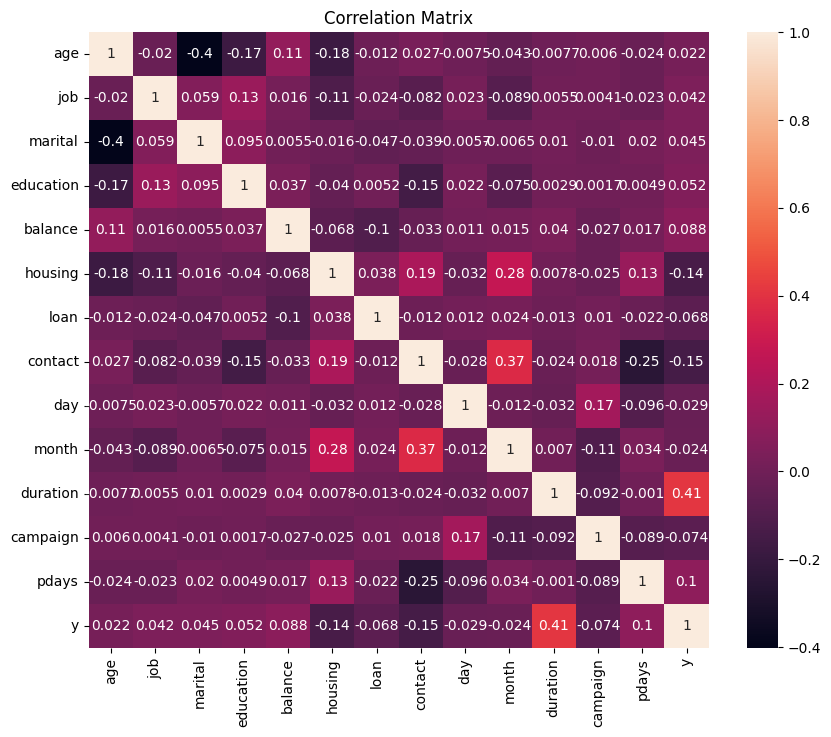

In [29]:
matrix = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True)
plt.title('Correlation Matrix')

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43722 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        43722 non-null  int64
 1   job        43722 non-null  int64
 2   marital    43722 non-null  int64
 3   education  43722 non-null  int64
 4   balance    43722 non-null  int64
 5   housing    43722 non-null  int64
 6   loan       43722 non-null  int64
 7   contact    43722 non-null  int64
 8   day        43722 non-null  int64
 9   month      43722 non-null  int64
 10  duration   43722 non-null  int64
 11  campaign   43722 non-null  int64
 12  pdays      43722 non-null  int64
 13  y          43722 non-null  int64
dtypes: int64(14)
memory usage: 6.0 MB


# Произведено разбиение датасета на тернировочную/тестовую выборки

Нужно ли было разбивать данные, если изначально в Kaggle были разделены?

In [31]:
X_train = df_train.drop(['job','marital','day','month','y'], axis = 1)
y_train = df_train['y']

In [32]:
X_test = df_test.drop(['job','marital','day','month','y'],axis=1)
y_test = df_test['y']

# Построение моделей

In [33]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

Точность простой модели = 0.88476

In [34]:
accuracy_score(y_test, y_pred_dummy)

0.8847600088476001

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

Но точность логистической регрессии чуть ниже = 0.883


In [36]:
y_pred_log_reg = log_reg.predict(X_test)
accuracy_score(y_test, y_pred_log_reg)

0.8829904888299049

In [37]:
print(log_reg.score(X_train, y_train))

0.8914734001189333


In [38]:
confusion_matrix(y_test, y_pred_dummy)

array([[4000,    0],
       [ 521,    0]])

In [39]:
confusion_matrix(y_test, y_pred_log_reg)

array([[3935,   65],
       [ 464,   57]])

ТО есть лолжные варианты присудствуют

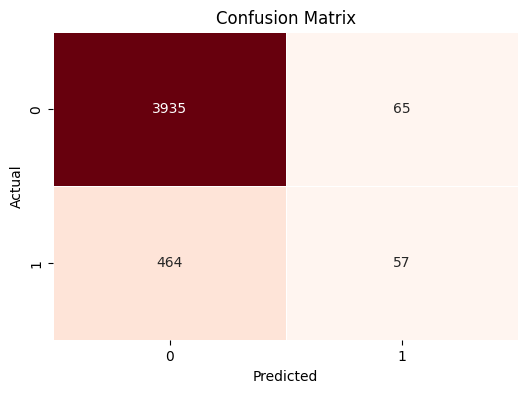

In [40]:
log = log_reg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Интересно почему F1-score не получатся 1

In [46]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      4000
           1       0.47      0.11      0.18       521

    accuracy                           0.88      4521
   macro avg       0.68      0.55      0.56      4521
weighted avg       0.85      0.88      0.85      4521



#вот тут я остановилась

Почему метрики RMSE и MSE получаются такие низкие? Я что-то делаю не так?

In [42]:
print(f'MSE for Dummy Regressor: {mean_squared_error(y_test, y_pred_dummy)}')
print(f'MSE for Linear regression: {mean_squared_error(y_test, y_pred_log_reg)}')

MSE for Dummy Regressor: 0.11523999115239991
MSE for Linear regression: 0.11700951117009512


In [43]:
print(f'RMSE for Dummy Regressor: {mean_squared_error(y_test, y_pred_dummy, squared=False)}')
print(f'RMSE for Linear regression: {mean_squared_error(y_test, y_pred_log_reg, squared=False)}')

RMSE for Dummy Regressor: 0.3394701623889792
RMSE for Linear regression: 0.3420665303272086
